In [47]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV,train_test_split,KFold,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
params = {'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']}


{'C': 1, 'kernel': 'linear'}

In [29]:
svc = SVC(kernel='rbf')

In [30]:
grid = GridSearchCV(svc,params, cv=2)

grid.fit(X_train, y_train)

grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [31]:
svc = SVC(kernel='poly')

In [32]:
grid = GridSearchCV(svc,params, cv=2)

grid.fit(X_train, y_train)

grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [33]:
svc = SVC(kernel='linear')

In [34]:
grid = GridSearchCV(svc,params, cv=2)

grid.fit(X_train, y_train)

grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [35]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001594,0.000418,0.002506,0.000513,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.924528,0.942308,0.933418,0.008890,6
1,0.002116,0.000128,0.001668,0.000336,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.641509,0.692308,0.666909,0.025399,9
2,0.002974,0.000008,0.002018,0.001017,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.943396,0.961538,0.952467,0.009071,3
3,0.003055,0.000523,0.001633,0.000351,1,linear,"{'C': 1, 'kernel': 'linear'}",0.962264,0.961538,0.961901,0.000363,1
4,0.002164,0.000244,0.002748,0.000749,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.886792,0.942308,0.914550,0.027758,7
5,0.002183,0.000812,0.001080,0.000042,1,poly,"{'C': 1, 'kernel': 'poly'}",0.962264,0.961538,0.961901,0.000363,1
6,0.001573,0.000540,0.001954,0.000488,10,linear,"{'C': 10, 'kernel': 'linear'}",0.886792,0.942308,0.914550,0.027758,7
7,0.001808,0.000656,0.001162,0.000139,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.943396,0.961538,0.952467,0.009071,3
8,0.002014,0.000482,0.001812,0.000530,10,poly,"{'C': 10, 'kernel': 'poly'}",0.886792,0.980769,0.933781,0.046988,5


In [36]:
predict = grid.predict(X_test)
predict

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [37]:
accuracy = accuracy_score(y_test,predict)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [38]:
cr = classification_report(y_test,predict)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [24]:
cm = confusion_matrix(y_test,predict)
print(cm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


<Axes: >

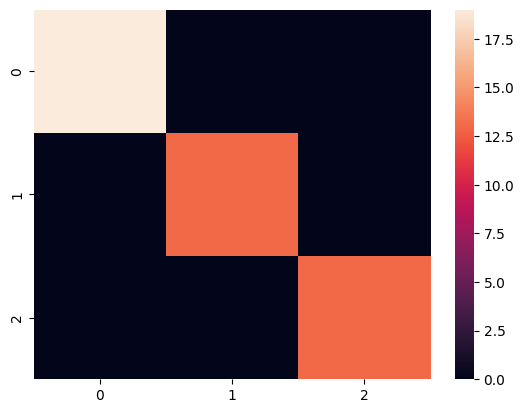

In [39]:
sns.heatmap(confusion_matrix(y_test,predict))

In [40]:
kf = KFold(n_splits=5, shuffle = True ,random_state=42)

In [48]:
cv_score = cross_val_score(svc, X,y,cv = kf)
print(cv_score)
print(np.mean(cv_score))

[1.         1.         0.96666667 0.93333333 0.96666667]
0.9733333333333334
